In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request as url
import json

In [2]:
response = url.urlopen('https://api.covid19india.org/states_daily.json')

In [3]:
data = json.load(response)

In [4]:
states = data['states_daily']

In [5]:
df = pd.DataFrame(states)

In [6]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [7]:
df.shape

(1011, 42)

In [8]:
df['dateymd'] = pd.to_datetime(df['dateymd'])

In [9]:
df['month'] = pd.to_datetime(df['dateymd']).dt.month

In [10]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,status,tg,tn,tr,tt,un,up,ut,wb,month
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,Confirmed,1,1,0,81,0,12,0,0,3
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,Recovered,0,0,0,9,0,4,0,0,3
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,Deceased,0,0,0,2,0,0,0,0,3
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,Confirmed,2,0,0,27,0,1,0,0,3
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,Recovered,1,0,0,4,0,0,0,0,3


In [26]:
confirmed_df = df[df['status'] == 'Confirmed']
recovered_df = df[df['status'] == 'Recovered']
deceased_df = df[df['status'] == 'Deceased']

In [27]:
confirmed_df.shape

(337, 43)

In [28]:
confirmed_df['dl'][0]

'7'

In [29]:
confirmed_df['dl'] = confirmed_df['dl'].astype('int')

<ipython-input-29-ae0fabcfaef9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_df['dl'] = confirmed_df['dl'].astype('int')


In [30]:
confirmed_df['mh'] = confirmed_df['mh'].astype('int')
confirmed_df['rj'] = confirmed_df['rj'].astype('int')
confirmed_df['up'] = confirmed_df['up'].astype('int')
confirmed_df['tt'] = confirmed_df['tt'].astype('int')

<ipython-input-30-8b12354089ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_df['mh'] = confirmed_df['mh'].astype('int')
<ipython-input-30-8b12354089ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_df['rj'] = confirmed_df['rj'].astype('int')
<ipython-input-30-8b12354089ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [37]:
recovered_df['tt'] = recovered_df['tt'].astype('int')
deceased_df['tt'] = deceased_df['tt'].astype('int')

<ipython-input-37-fabf817e39b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recovered_df['tt'] = recovered_df['tt'].astype('int')
<ipython-input-37-fabf817e39b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deceased_df['tt'] = deceased_df['tt'].astype('int')


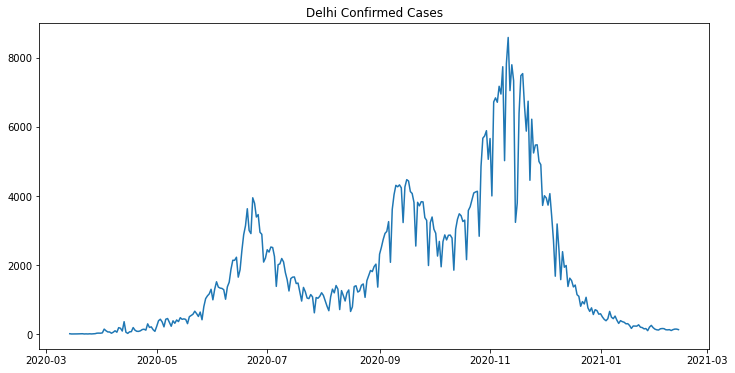

In [31]:
plt.figure(figsize=(12,6))
plt.title('Delhi Confirmed Cases')
plt.plot(confirmed_df['dateymd'],confirmed_df['dl'])
plt.show()

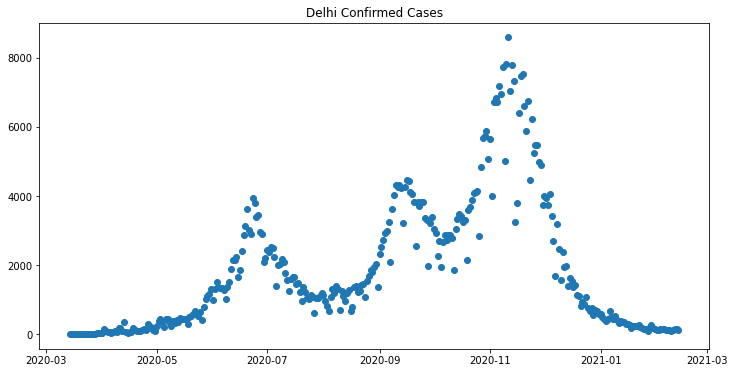

In [32]:
plt.figure(figsize=(12,6))
plt.title('Delhi Confirmed Cases')
plt.scatter(confirmed_df['dateymd'],confirmed_df['dl'])
plt.show()

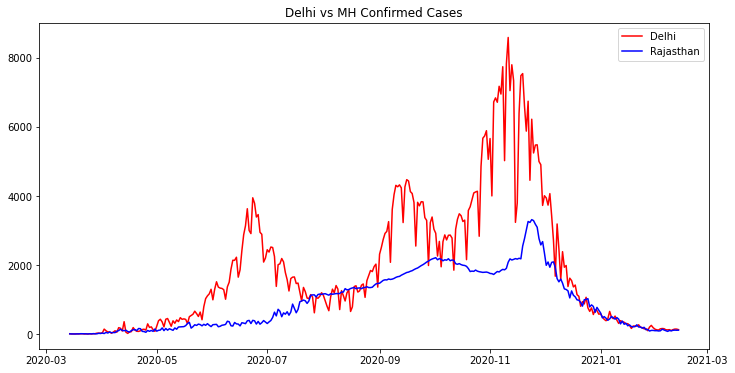

In [35]:
plt.figure(figsize=(12,6))
plt.title('Delhi vs MH Confirmed Cases')
plt.plot(confirmed_df['dateymd'],confirmed_df['dl'], 'r', label='Delhi')
# plt.plot(confirmed_df['dateymd'],confirmed_df['mh'], 'g', label='Maharastra')
plt.plot(confirmed_df['dateymd'],confirmed_df['rj'], 'b', label='Rajasthan')
plt.legend()
plt.show()

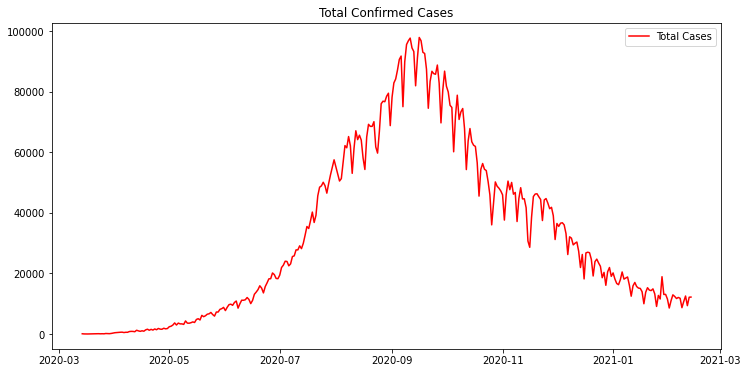

In [36]:
plt.figure(figsize=(12,6))
plt.title('Total Confirmed Cases')
plt.plot(confirmed_df['dateymd'],confirmed_df['tt'], 'r', label='Total Cases')
plt.legend()
plt.show()

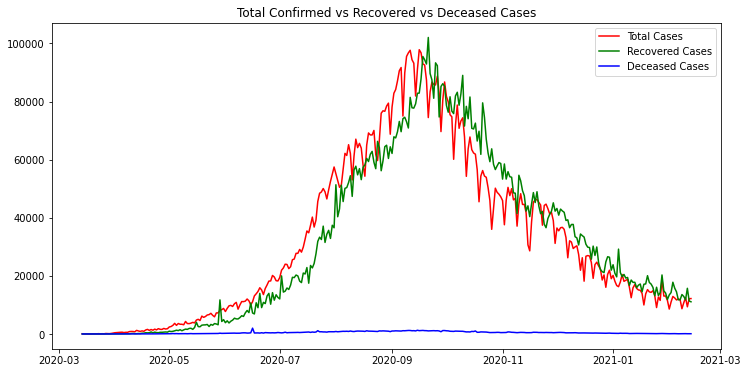

In [39]:
plt.figure(figsize=(12,6))
plt.title('Total Confirmed vs Recovered vs Deceased Cases')
plt.plot(confirmed_df['dateymd'],confirmed_df['tt'], 'r', label='Total Cases')
plt.plot(recovered_df['dateymd'],recovered_df['tt'], 'g', label='Recovered Cases')
plt.plot(deceased_df['dateymd'],deceased_df['tt'], 'b', label='Deceased Cases')
plt.legend()
plt.show()

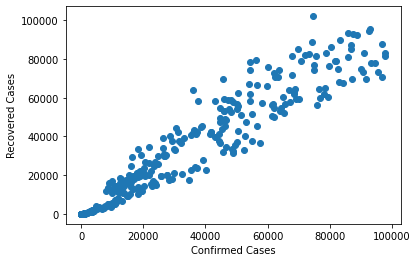

In [41]:
plt.scatter(confirmed_df['tt'], recovered_df['tt'])
plt.xlabel('Confirmed Cases')
plt.ylabel('Recovered Cases')
plt.show()

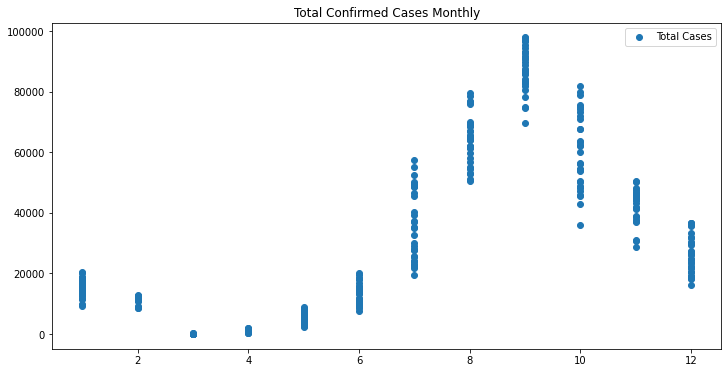

In [44]:
plt.figure(figsize=(12,6))
plt.title('Total Confirmed Cases Monthly')
plt.scatter(confirmed_df['month'],confirmed_df['tt'], label='Total Cases')
plt.legend()
plt.show()